In [128]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [129]:
all_def = pd.read_csv("FBRef Data/Defensive Action.csv", encoding="latin1")
all_ptype = pd.read_csv("FBRef Data/Passing Stats.csv", encoding="latin1")
all_pass = pd.read_csv("FBRef Data/Pass.csv", encoding="latin1")
all_poss = pd.read_csv("FBRef Data/Possesion.csv", encoding="latin1")
all_misc = pd.read_csv("FBRef Data/Misc.csv", encoding="latin1")
all_goal = pd.read_csv("FBRef Data/Goal and Shot Creation.csv", encoding="latin1")
all_std = pd.read_csv("FBRef Data/Standards.csv", encoding="latin1")


In [130]:
all_poss = all_poss[all_poss["90s"] != "90s"]
all_misc = all_misc[all_misc["90s"] != "90s"]
all_goal = all_goal[all_goal["90s"] != "90s"] 
all_def = all_def[all_def["90s"]!= "90s"]
all_ptype = all_ptype[all_ptype["90s"] != "90s"]
all_pass = all_pass[all_pass["90s"] != "90s"]
all_std = all_std[all_std["Rk"] != "Rk"]

In [131]:
all_goal["90s"]= all_goal["90s"].astype("float64")
all_misc["90s"] = all_misc["90s"].astype("float64")
all_poss["90s"] = all_poss["90s"].astype("float64")
all_std["90s"] = all_std["90s"].astype("float64")  
all_std["Age"] = all_std["Age"].astype("float64")  

In [132]:
all_poss = all_poss[all_poss["90s"] > 13.0]
all_misc = all_misc[all_misc["90s"] > 13.0]
all_goal = all_goal[all_goal["90s"] > 13.0] 
all_def = all_def[all_def["90s"] > 13.0]
all_ptype = all_ptype[all_ptype["90s"] > 13.0]
all_pass = all_pass[all_pass["90s"] > 13.0]
all_std = all_std[all_std["90s"] > 13.0]

In [133]:
all_def.drop(columns=["Rk", "Nation", "Matches" ,"Comp" ,"Born"], inplace=True)
all_ptype.drop(columns=["Rk", "Nation", "Matches" ,"Comp" ,"Born"], inplace=True)
all_pass.drop(columns=["Rk", "Nation", "Matches" ,"Comp" ,"Born"], inplace=True)
all_poss.drop(columns=["Rk", "Nation", "Matches" ,"Comp" ,"Born"], inplace=True)
all_misc.drop(columns=["Rk", "Nation", "Matches" ,"Comp" ,"Born"], inplace=True)
all_goal.drop(columns=["Rk", "Nation", "Matches" ,"Comp" ,"Born"], inplace=True)
all_std.drop(columns=["Rk", "Nation" ,"Comp" ,"Born"], inplace=True)


In [134]:
def creating_df(df, position):
    df_position = df[df["Pos"] == position]
    df_position.reset_index(inplace=True)
    
    return df_position

In [135]:
mid_def = creating_df(all_def, "MF")
mid_def = mid_def[mid_def["Age"] < 29]

In [136]:
mid_def = mid_def.sort_values("Tkl+Int",ascending=False)
mid_def.reset_index(inplace= True)

In [137]:
mid_def.columns

Index(['level_0', 'index', 'Player', 'Pos', 'Squad', 'Age', '90s', 'Tkl',
       'TklW', 'Def 3rd', 'Mid 3rd', 'Att 3rd', 'Tkl.1', 'Att', 'Tkl%', 'Past',
       'Press', 'Succ', '%', 'Def 3rd.1', 'Mid 3rd.1', 'Att 3rd.1', 'Blocks',
       'Sh', 'ShSv', 'Pass', 'Int', 'Tkl+Int', 'Clr', 'Err'],
      dtype='object')

In [138]:
mid_poss= creating_df(all_poss, "MF")
mid_poss = mid_poss[mid_poss["Age"] < 29]

In [139]:
mid_poss= mid_poss.sort_values("Dispos" , ascending=True)
mid_poss.reset_index(inplace=True)

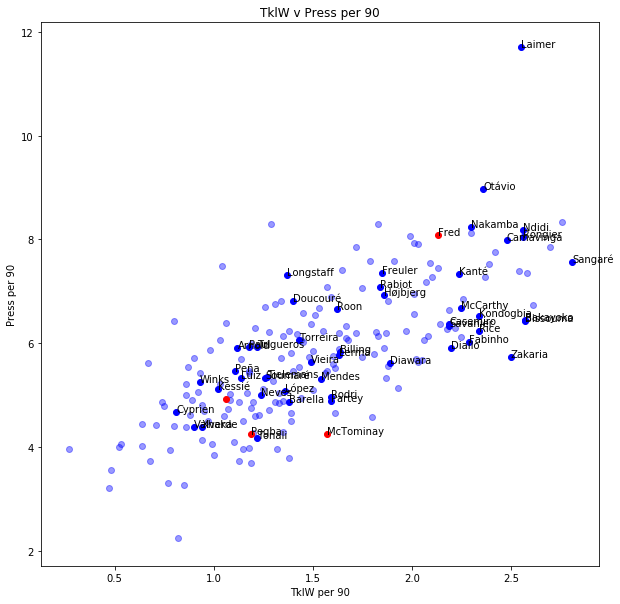

In [140]:
x = mid_def["TklW"]
y = mid_def["Succ"]
z = mid_def["Player"]
fig,ax = plt.subplots(1,1,figsize=(10,10))
for i in range(mid_def.shape[0]):
    if mid_def["Squad"][i] == "Manchester Utd":
        ax.scatter(x[i],y[i],c ="red")
    elif not mid_def["Player"][i] in list_of_mids:
        ax.scatter(x[i],y[i],c="blue", alpha = 0.4)
    elif mid_def["Player"][i] in list_of_mids:
        ax.scatter(x[i],y[i],c="blue")
ax.set_xlabel("TklW per 90")
ax.set_ylabel("Press per 90")
plt.title("TklW v Press per 90")
for i in range(mid_def.shape[0]):
    if mid_def["Player"][i] in list_of_mids:
        new_name = mid_def["Player"][i].split(" ")[-1]
        ax.annotate(new_name,(x.iloc[i],y.iloc[i]))
    else:
        continue
    
plt.savefig("TklW v Press for all mids")

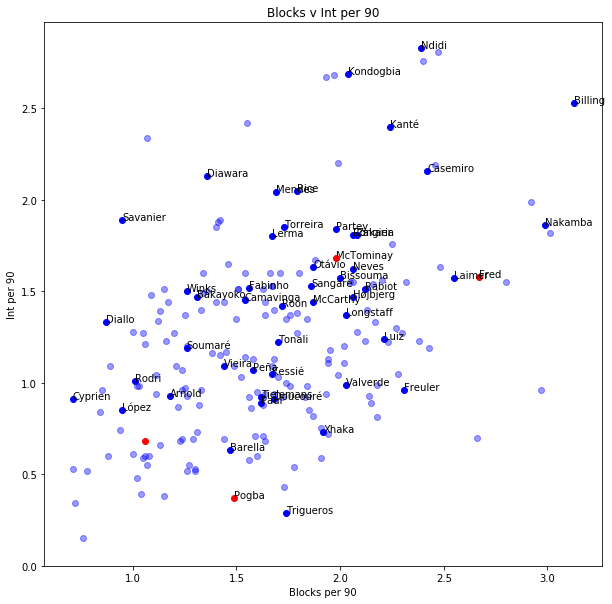

In [141]:
x = mid_def["Blocks"]
y = mid_def["Int"]
z = mid_def["Player"]
fig,ax = plt.subplots(1,1,figsize=(10,10))
for i in range(mid_def.shape[0]):
    if mid_def["Squad"][i] == "Manchester Utd":
        ax.scatter(x[i],y[i],c ="red")
    elif not mid_def["Player"][i] in list_of_mids:
        ax.scatter(x[i],y[i],c="blue", alpha = 0.4)
    elif mid_def["Player"][i] in list_of_mids:
        ax.scatter(x[i],y[i],c="blue")
ax.set_xlabel("Blocks per 90")
ax.set_ylabel("Int per 90")
plt.title("Blocks v Int per 90")
for i in range(mid_def.shape[0]):
    if mid_def["Player"][i] in list_of_mids:
        new_name = mid_def["Player"][i].split(" ")[-1]
        ax.annotate(new_name,(x.iloc[i],y.iloc[i]))
    else:
        continue
    
plt.savefig("Blocks v Int for all mids")

In [94]:
list_of_mids=  ['Amadou Diawara',
 'Rúben Neves',
 'Granit Xhaka',
 'Fabinho',
"Valentin Rongier",
 'Thomas Partey',
 'Harry Winks',
 'Marten de Roon',
 'Marvelous Nakamba',
 'Casemiro',
 'Jefferson Lerma',
 'Declan Rice',
 'Rodri',
 'Federico Valverde',
 'James McCarthy',
 'Otávio',
 'Remo Freuler',
 'Geoffrey Kondogbia',
 'Wilfred Ndidi',
 'Maximilian Arnold',
 'Manu Trigueros',
 'Lucas Torreira',
 'Douglas Luiz',
 'Denis Zakaria',
 'Wylan Cyprien',
 'Sandro Tonali',
 'Thiago Mendes',
 'Fabián Ruiz Peña',
 'Ronaldo Vieira',
 'Pierre Højbjerg',
 'Ibrahima Diallo',
 'Nicolò Barella',
 'Sean Longstaff',
 'Eduardo Camavinga',
 'Unai López',
 'Adrien Rabiot',
 'Franck Kessié',
 'Boubakary Soumaré',
 'Téji Savanier',
 'Abdoulaye Doucouré',
 'Youri Tielemans',
 'Scott McTominay',
 "N'Golo Kanté",
 'Fred',
 'Tiemoué Bakayoko',
 'Rodrigo De Paul',
 'Paul Pogba',
 'Yves Bissouma',
'Konrad Laimer',"Ibrahim Sangaré",
               "Philip Billing"]

In [64]:
len(list_of_mids)

49

In [76]:
last_name = []
for player in list_of_mids:
    last = player.split(" ")[-1]
    last_name.append(last)

In [74]:
list_of_mids[3].split(" ")[-1]

'Fabinho'

In [81]:
last_name[0] == list_of_mids[0].split(" ")[-1]

True

In [93]:
mid_def[mid_def["TklW"] > 2.6]

,level_0,index,Player,Pos,Squad,Age,90s,Tkl,TklW,Def 3rd,...,Mid 3rd.1,Att 3rd.1,Blocks,Sh,ShSv,Pass,Int,Tkl+Int,Clr,Err
1,7,88,Benjamin André,MF,Lille,28.0,22.8,3.64,2.76,1.49,...,13.7,3.90,1.97,0.53,0.0,1.45,2.68,6.32,2.06,0.00
23,228,2239,Ibrahim Sangaré,MF,Toulouse,21.0,24.2,3.55,2.81,1.74,...,11.2,2.40,1.86,0.50,0.0,1.36,1.53,5.08,2.69,0.08
24,149,1504,Habib Maïga,MF,Metz,23.0,25.2,3.81,2.70,1.75,...,16.6,3.37,2.30,0.28,0.0,2.02,1.27,5.08,2.02,0.00
44,271,2594,Marco Verratti,MF,Paris S-G,26.0,16.5,3.52,2.61,1.39,...,10.6,6.00,1.52,0.12,0.0,1.39,1.03,4.55,0.55,0.00


In [98]:
mid_pass = creating_df(all_pass, "MF")
mid_pass = mid_pass[mid_pass["Age"] < 29]

In [99]:
mid_pass.columns

Index(['index', 'Player', 'Pos', 'Squad', 'Age', '90s', 'Cmp', 'Att', 'Cmp%',
       'TotDist', 'PrgDist', 'Cmp.1', 'Att.1', 'Cmp%.1', 'Cmp.2', 'Att.2',
       'Cmp%.2', 'Cmp.3', 'Att.3', 'Cmp%.3', 'Ast', 'xA', 'A-xA', 'KP',
       '01-Mar', 'PPA', 'CrsPA', 'Prog'],
      dtype='object')

In [102]:
mid_pass.sort_values("Cmp%", ascending=False)

,index,Player,Pos,Squad,Age,90s,Cmp,Att,Cmp%,TotDist,...,Att.3,Cmp%.3,Ast,xA,A-xA,KP,01-Mar,PPA,CrsPA,Prog
216,2131,Rodri,MF,Manchester City,23.0,27.6,85.6,91.9,93.1,1760.9,...,26.60,90.5,0.07,0.06,0.01,1.16,8.41,0.72,0.04,6.09
271,2594,Marco Verratti,MF,Paris S-G,26.0,16.5,97.4,105.0,92.7,1638.2,...,19.20,83.3,0.30,0.18,0.12,1.52,9.82,2.61,0.36,10.70
117,1204,Frenkie de Jong,MF,Barcelona,22.0,23.5,65.4,70.7,92.5,1101.3,...,11.60,90.8,0.09,0.10,-0.01,0.98,6.55,0.89,0.09,4.81
102,1038,?lkay Gündo?an,MF,Manchester City,28.0,22.4,79.4,87.3,91.0,1491.3,...,20.30,88.4,0.04,0.13,-0.08,1.52,7.54,1.47,0.04,6.92
280,2660,Georginio Wijnaldum,MF,Liverpool,28.0,32.6,45.3,49.9,90.7,781.4,...,7.79,87.4,0.00,0.04,-0.04,0.55,3.99,0.74,0.00,3.16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212,2109,Luis Rioja,MF,Alavés,25.0,18.2,16.8,24.0,70.2,243.4,...,4.01,32.9,0.00,0.12,-0.12,0.88,0.77,0.71,0.27,2.20
161,1616,Dwight McNeil,MF,Burnley,19.0,37.1,23.6,34.4,68.4,457.4,...,11.10,51.2,0.16,0.18,-0.02,1.48,2.48,1.13,0.78,3.96
10,110,Mauro Arambarri,MF,Getafe,23.0,34.1,19.0,28.5,66.8,411.9,...,9.47,61.3,0.03,0.05,-0.02,0.38,2.73,0.59,0.15,2.79
33,299,Dimitri Bisoli,MF,Brescia,25.0,23.9,21.3,32.7,65.2,346.6,...,6.99,44.3,0.04,0.13,-0.08,0.96,2.51,1.21,0.25,4.64


In [103]:
mid_pass.sort_values("PrgDist", ascending=False)

,index,Player,Pos,Squad,Age,90s,Cmp,Att,Cmp%,TotDist,...,Att.3,Cmp%.3,Ast,xA,A-xA,KP,01-Mar,PPA,CrsPA,Prog
271,2594,Marco Verratti,MF,Paris S-G,26.0,16.5,97.4,105.0,92.7,1638.2,...,19.20,83.3,0.30,0.18,0.12,1.52,9.82,2.61,0.36,10.70
2,50,Thiago Alcántara,MF,Bayern Munich,28.0,19.7,83.7,93.4,89.6,1754.6,...,27.40,86.3,0.00,0.05,-0.05,1.12,9.39,0.91,0.05,10.50
216,2131,Rodri,MF,Manchester City,23.0,27.6,85.6,91.9,93.1,1760.9,...,26.60,90.5,0.07,0.06,0.01,1.16,8.41,0.72,0.04,6.09
200,1998,Paul Pogba,MF,Manchester Utd,26.0,13.4,65.7,76.6,85.8,1325.4,...,19.90,80.9,0.22,0.19,0.03,2.01,8.81,2.16,0.07,8.66
119,1209,Jorginho,MF,Chelsea,27.0,26.4,74.1,84.1,88.0,1421.1,...,20.80,80.7,0.08,0.09,-0.02,0.87,9.02,1.17,0.04,7.23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14,150,Ramon Azeez,MF,Granada,26.0,15.1,20.9,26.1,80.2,372.3,...,4.77,76.4,0.00,0.02,-0.02,0.40,1.72,0.26,0.00,1.59
105,1073,Jeff Hendrick,MF,Burnley,27.0,21.5,19.5,26.7,73.0,320.0,...,5.77,54.0,0.09,0.04,0.06,0.56,1.16,0.47,0.09,2.23
212,2109,Luis Rioja,MF,Alavés,25.0,18.2,16.8,24.0,70.2,243.4,...,4.01,32.9,0.00,0.12,-0.12,0.88,0.77,0.71,0.27,2.20
84,869,Lamine Fomba,MF,Nîmes,21.0,15.3,19.6,27.8,70.4,336.6,...,5.36,63.4,0.00,0.03,-0.03,0.46,1.31,0.26,0.00,2.03


In [107]:
mid_misc = creating_df(all_misc, "MF")
mid_misc["Age"] = mid_misc["Age"].astype("float64")
mid_misc = mid_misc[mid_misc["Age"] < 29]

C:\Users\91783\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [109]:
mid_misc["Won"] = mid_misc["Won"].astype("float64")
mid_misc["90s"] = mid_misc["90s"].astype("float64")
mid_misc["Won%"] = mid_misc["Won%"].astype("float64")


In [110]:
    mid_misc["Won"] = mid_misc["Won"]/mid_misc["90s"]

In [112]:
mid_misc.reset_index(inplace=True)

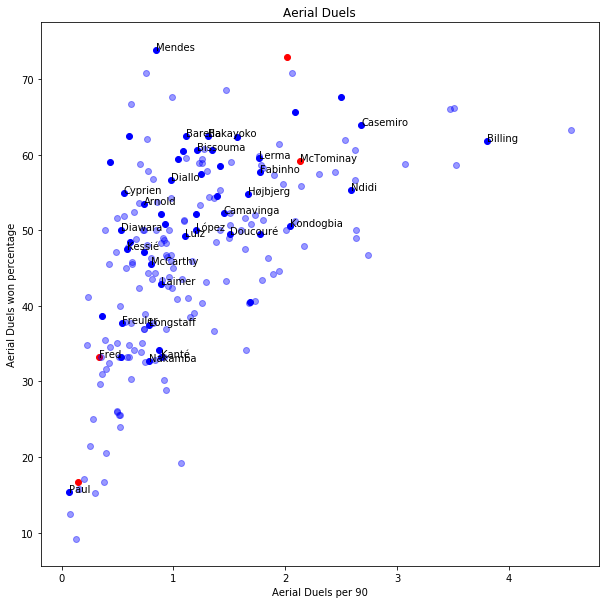

In [142]:
x = mid_misc["Won"]
y = mid_misc["Won%"]
z = mid_misc["Player"]
fig,ax = plt.subplots(1,1,figsize=(10,10))
for i in range(mid_misc.shape[0]):
    if mid_misc["Squad"][i] == "Manchester Utd":
        ax.scatter(x[i],y[i],c ="red")
    elif not mid_misc["Player"][i] in list_of_mids:
        ax.scatter(x[i],y[i],c="blue", alpha = 0.4)
    elif mid_misc["Player"][i] in list_of_mids:
        ax.scatter(x[i],y[i],c="blue")
ax.set_xlabel("Aerial Duels per 90")
ax.set_ylabel("Aerial Duels won percentage")
plt.title("Aerial Duels")
for i in range(135):
    if mid_misc["Player"][i] in list_of_mids:
        new_name = mid_misc["Player"][i].split(" ")[-1]
        ax.annotate(new_name,(x.iloc[i],y.iloc[i]))
    else:
        continue
    
plt.savefig("aerials all mids")

In [119]:
mid_misc[mid_misc["Player"] == "Wilfred Ndidi"]

,level_0,index,Player,Pos,Squad,Age,90s,CrdY,CrdR,2CrdY,...,Crs,Int,TklW,PKwon,PKcon,OG,Recov,Won,Lost,Won%
133,182,1839,Wilfred Ndidi,MF,Leicester City,22.0,29.7,6,0,0,...,3,84,76,0,3,0,430,2.592593,62,55.4


In [121]:
mid_misc["Player"][133].split(" ")[-1]

'Ndidi'

In [122]:
"Wilfred Ndidi" in list_of_mids

True

In [123]:
(mid_def.shape[0])

100

In [144]:
mark = np.array(list_of_mids)

In [145]:
mark = pd.DataFrame(mark)

In [146]:
mark.to_csv("Market Value for mids.csv")

In [149]:
mark = pd.read_csv("Market Value for mids.csv")

In [150]:
mark

,Player,Value
0,Amadou Diawara,18.5
1,Rúben Neves,50.0
2,Thomas Partey,40.0
3,Marvelous Nakamba,8.0
4,Jefferson Lerma,20.0
5,Declan Rice,49.5
6,Geoffrey Kondogbia,22.5
7,Wilfred Ndidi,45.0
8,Douglas Luiz,22.0
9,Denis Zakaria,40.0


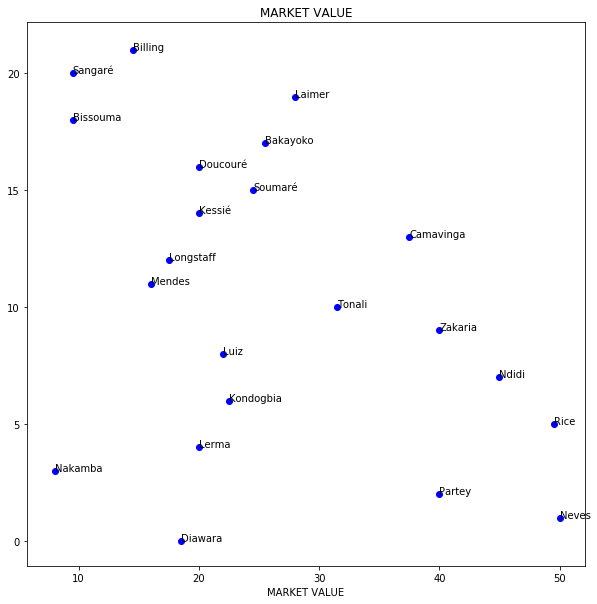

In [169]:
x = mark["Value"]
y = list(range(22))
z = mark["Player"]
fig,ax = plt.subplots(1,1,figsize=(10,10))
for i in range(mark.shape[0]):
    ax.scatter(x[i],y[i],c="blue")
ax.set_xlabel("MARKET VALUE")
plt.title("MARKET VALUE")
for i in range(mark.shape[0]):
    if mark["Player"][i] in list_of_mids:
        new_name = mark["Player"][i].split(" ")[-1]
        ax.annotate(new_name,(x.iloc[i],y[i]))
    else:
        continue
    
plt.savefig("market value all mids")

In [162]:
list(range(22))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21]

In [167]:
mark["Player"]

0         Amadou Diawara
1            Rúben Neves
2          Thomas Partey
3      Marvelous Nakamba
4        Jefferson Lerma
5            Declan Rice
6     Geoffrey Kondogbia
7          Wilfred Ndidi
8           Douglas Luiz
9          Denis Zakaria
10         Sandro Tonali
11         Thiago Mendes
12        Sean Longstaff
13     Eduardo Camavinga
14         Franck Kessié
15     Boubakary Soumaré
16    Abdoulaye Doucouré
17      Tiemoué Bakayoko
18         Yves Bissouma
19         Konrad Laimer
20       Ibrahim Sangaré
21        Philip Billing
Name: Player, dtype: object